In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform
import scipy.constants as cnt
from scipy.signal import find_peaks
from IPython.display import Latex
from IPython.display import Markdown as md
import xkcd

In [2]:
dataset = pd.read_excel("data/MoSe2 PL data with Temp.xlsx").replace('--', 0)
dataset

,Energy (eV),MoSe2_14K,20K,30K,40K,50K,60K,70K,80K,90K,...,155K,160K,165K,170K,180K,200K,220K,240K,270K,300K
0,1.90816,0.000104,0.000601,0.000541,0.000268,0.001030,0.00464,0.00208,0.002610,0.01010,...,0.00803,0.00798,0.01267,0.01524,0.02089,0.01701,0.01107,0.01016,0.00891,0.00000
1,1.90740,0.000623,0.000722,0.000361,0.000134,0.000734,0.00341,0.00458,0.003130,0.00777,...,0.00896,0.00982,0.01204,0.01704,0.02015,0.01587,0.00909,0.00782,0.00806,0.03902
2,1.90665,0.000311,0.000481,0.000902,0.000268,0.000441,0.00372,0.00166,0.003650,0.01010,...,0.00834,0.00828,0.01077,0.01435,0.01869,0.01474,0.00988,0.00743,0.00000,0.00884
3,1.90590,0.000311,0.000722,0.000902,0.000268,0.001030,0.00341,0.00166,0.001040,0.00777,...,0.00773,0.00583,0.01204,0.01644,0.01869,0.01474,0.01107,0.00704,0.00849,0.00832
4,1.90515,0.000415,0.000842,0.000902,0.000000,0.000588,0.00402,0.00375,0.000521,0.00622,...,0.00958,0.00706,0.01077,0.01554,0.01979,0.01398,0.01067,0.00743,0.00637,0.00989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1.36824,0.001040,0.001200,0.001260,0.001680,0.002500,0.00650,0.00416,0.005210,0.01010,...,0.01051,0.01227,0.01615,0.01464,0.02162,0.01965,0.01067,0.01368,0.00934,0.00937
1020,1.36786,0.001250,0.001440,0.001800,0.001740,0.003230,0.00650,0.00458,0.006780,0.01399,...,0.01020,0.00890,0.01109,0.01255,0.02272,0.01587,0.01225,0.00977,0.00806,0.00989
1021,1.36749,0.001140,0.001080,0.001620,0.001940,0.003080,0.00619,0.00458,0.006260,0.00855,...,0.01174,0.00583,0.01489,0.01345,0.01942,0.01323,0.01265,0.01446,0.01698,0.01041
1022,1.36712,0.000934,0.001560,0.001800,0.001810,0.003080,0.00464,0.00458,0.006260,0.01321,...,0.01483,0.00644,0.01299,0.01674,0.02089,0.01776,0.01304,0.00977,0.01231,0.01145


In [3]:
#energy
# x = dataset.head()
x = np.asarray(list(dataset.columns))
for i in range(len(x)):
    x[i] = x[i].replace("K", ".")

temp = np.asarray([float(string) for string in x[2:]])
# temp
temp = np.insert(temp, 0, 14)


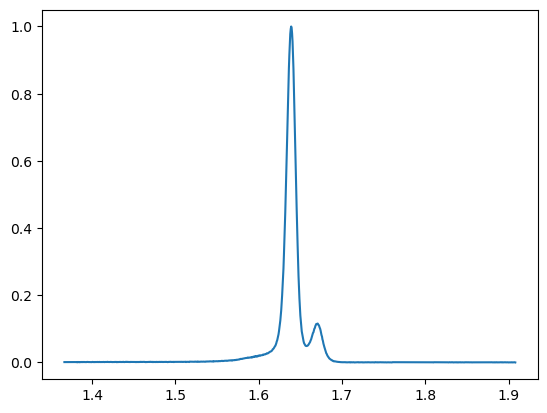

In [4]:
k14 = dataset["MoSe2_14K"]
en = dataset["Energy (eV)"]
plt.plot(en, k14)


In [5]:
headers = list(dataset.columns)
headers = headers[1:]
matrix = (dataset[headers]).values
matrix.shape
# type(matrix[0, 1])

(1024, 23)

In [6]:
# plt.figure(figsize=(1,100))
# plt.imshow(matrix)
# plt.ylim(400, 600)
energy = dataset["Energy (eV)"]
energy

0       1.90816
1       1.90740
2       1.90665
3       1.90590
4       1.90515
         ...   
1019    1.36824
1020    1.36786
1021    1.36749
1022    1.36712
1023    1.36675
Name: Energy (eV), Length: 1024, dtype: float64

In [7]:
dataset.columns

Index(['Energy (eV)', 'MoSe2_14K', '20K', '30K', '40K', '50K', '60K', '70K',
       '80K', '90K', '100K', '120K', '145K', '150K', '155K', '160K', '165K',
       '170K', '180K', '200K', '220K', '240K', '270K', '300K'],
      dtype='object')

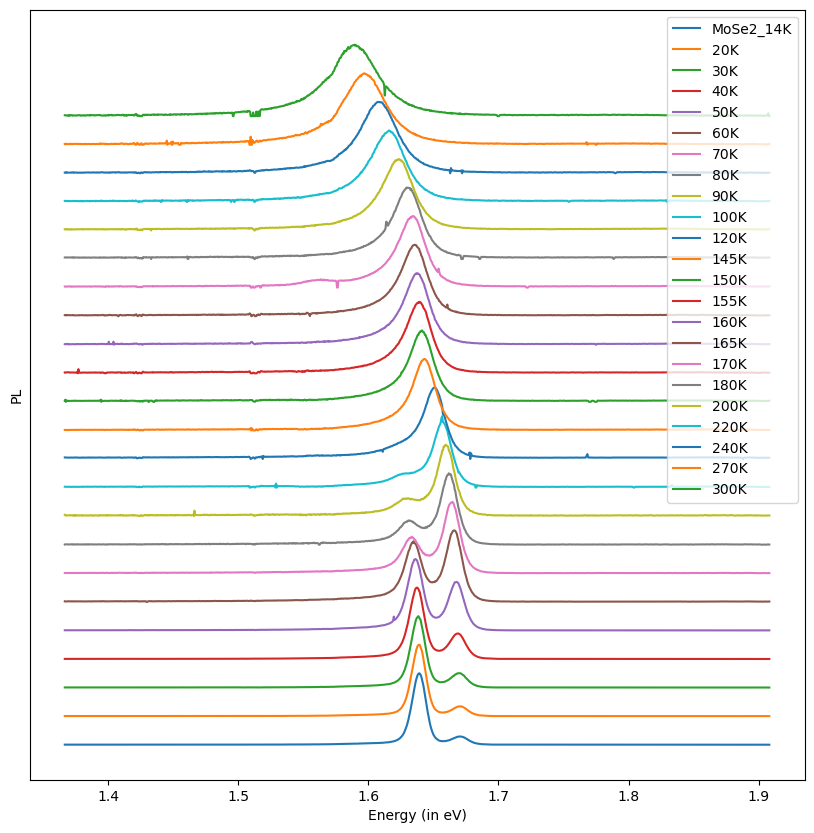

In [8]:
def plot1(dataset, ind, energy):
    plt.plot(energy, (dataset[list(dataset.columns)[ind]] + 0.4*i) , 
            label = list(dataset.columns)[ind])
    plt.legend()
    
plt.figure(figsize=(10, 10))   
for i in range(23):
    plot1(dataset, i+1, energy)

plt.xlabel("Energy (in eV)")
plt.ylabel("PL")
plt.yticks([])

# plt.tick_params(left=False)
plt.show()

In [9]:
temp

array([ 14.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 120.,
       145., 150., 155., 160., 165., 170., 180., 200., 220., 240., 270.,
       300.])

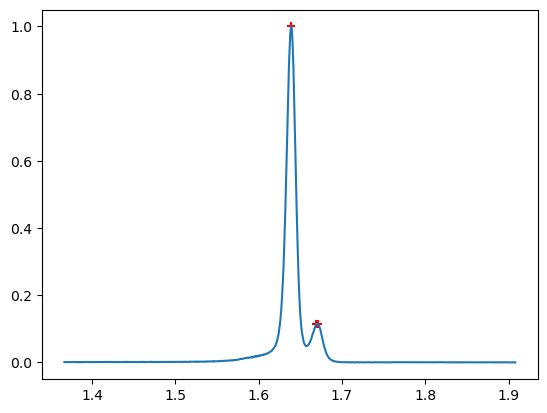

In [10]:
peaks, _ = find_peaks(k14, height=0.1)
plt.plot(en, k14)
plt.scatter(en[peaks], k14[peaks], marker='+', color="r")

In [11]:
# def plot1(dataset, ind, energy):
#     plt.plot(energy, dataset[list(dataset.columns)[ind]], 
#             label = list(dataset.columns)[ind])
#     plt.legend()
    
# plt.figure(figsize=(10, 10))   
# for i in range(23):
#     plot1(dataset, i+1, energy)

In [12]:
# energy = dataset["Energy (eV)"]
# def plot(dataset, ind1, energy):
#     fig, ax = plt.subplots(6, 4, figsize=(15, 10), sharex=True, sharey=True)
#     lam = dataset[list(dataset.columns)[ind1]]
#     ax[ind1, ind2].plot(energy, lam, label=f"%d" %ind1)
#     ax[ind1, ind2].legend()
#     plt.legend()

In [13]:
# for i in range(2):
# plot(dataset, 1, energy)

In [14]:
energy_gap = []
for i in range(23):
    indices = np.where(dataset[list(dataset.columns)[i+1]] == np.max(dataset[list(dataset.columns)[i+1]]))
#     print(energy[indices[0]].values)
    k = energy[indices[0]].values
    energy_gap.append(k)
print(np.asarray(energy_gap).shape)

(23, 1)


In [15]:
energy_gap = []
for i in range(23):
    if i > 6:
        indices = np.where(dataset[list(dataset.columns)[i+1]] == np.max(dataset[list(dataset.columns)[i+1]]))
    #     print(energy[indices[0]].values)
        k = energy[indices[0]].values
        energy_gap.append(k[0])
        
    elif i <= 6:
        indices, _ = find_peaks(dataset[list(dataset.columns)[i+1]], height=0.1)
        k = energy[indices].values
        energy_gap.append(max(k))
print(energy_gap)
    

[1.6709, 1.67147, 1.67033, 1.66919, 1.66805, 1.66635, 1.66465, 1.66182, 1.65957, 1.65677, 1.65063, 1.64344, 1.64124, 1.63959, 1.63686, 1.63577, 1.63468, 1.62925, 1.62333, 1.61585, 1.6074, 1.59696, 1.58923]


In [16]:
energy_gap = np.asarray(energy_gap)

Text(0, 0.5, 'Energy Gap (in eV)')

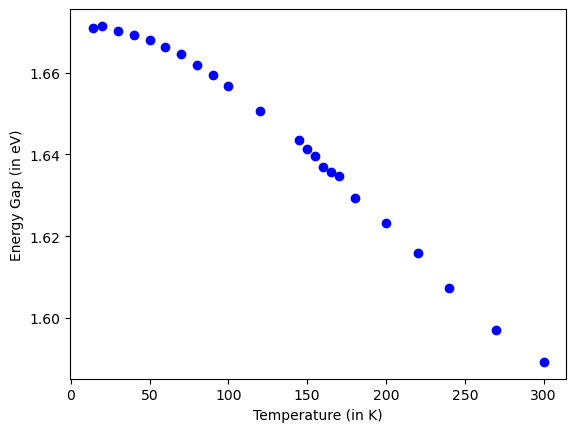

In [17]:
plt.plot(temp, energy_gap, 'o', c='b')
plt.xlabel("Temperature (in K)")
plt.ylabel("Energy Gap (in eV)")

### Figuring out the constants

### $E_g(T) = E_G(0) - \frac{aT^2}{T+b}$

Values to find $E_g(0), a, b$

In [18]:
from scipy.optimize import curve_fit

def eqn(x, E0, a, b):
    return E0 - ((a*x**2)/(b+x))

In [19]:
energy_gap

array([1.6709 , 1.67147, 1.67033, 1.66919, 1.66805, 1.66635, 1.66465,
       1.66182, 1.65957, 1.65677, 1.65063, 1.64344, 1.64124, 1.63959,
       1.63686, 1.63577, 1.63468, 1.62925, 1.62333, 1.61585, 1.6074 ,
       1.59696, 1.58923])

In [20]:
constants, pcov = curve_fit(eqn, temp, energy_gap.T, bounds=(-10, 310), method="dogbox")

In [21]:
print("E_0 value is: %.10f" %(constants[0]))
print("a value is: %.5f meV/K$" %(constants[1]*1e3))
print("b values is: %.10f K" %constants[2])


E_0 value is: 1.6729682272
a value is: 0.44314 meV/K$
b values is: 160.8149241312 K


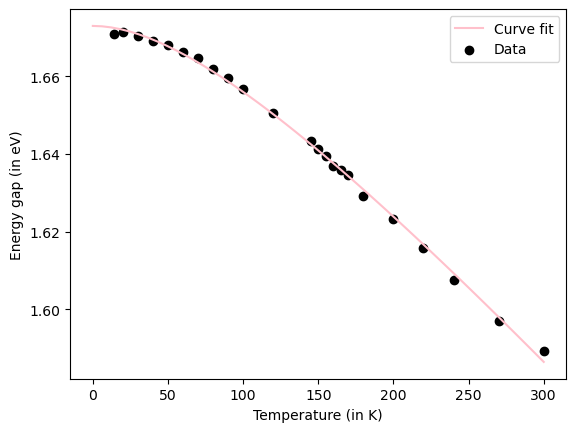

In [22]:
x = np.linspace(0, 300)
plt.plot(x, eqn(x, constants[0], constants[1], constants[2]), label="Curve fit", c='pink')
plt.scatter(temp, energy_gap, color="k", label="Data")
plt.xlabel("Temperature (in K)")
plt.ylabel("Energy gap (in eV)")
plt.legend()

In [23]:
np.round(constants, decimals=5)


array([1.6729700e+00, 4.4000000e-04, 1.6081492e+02])

## Testing phonon model

### $E_g(T) = E_g(0) - S\hbar \omega \left[\coth \left(\frac{\hbar \omega}{2kT} \right) - 1 \right]$

In [24]:
def eqn2(t, S, w):
    return constants[0] -( S * w * ((1/np.tanh(w / (2 * cnt.k * t))) - 1))

In [25]:
def eqn2(t, S, w):
    return constants[0] -( S * cnt.hbar * w * (cnt.e)**(-1) * ((1/np.tanh( cnt.hbar * w / (2 * cnt.k * t))) - 1)) 
# converting energies in electron volt units

In [26]:
temp

array([ 14.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 120.,
       145., 150., 155., 160., 165., 170., 180., 200., 220., 240., 270.,
       300.])

In [27]:
params, pcov = curve_fit(eqn2, temp, energy_gap, p0=[1, 1e12], maxfev=10000)
params[1]*cnt.hbar/cnt.e

0.012101488051401576

C:\Users\ksb99\AppData\Local\Temp\ipykernel_50332\1106199592.py:2: RuntimeWarning: divide by zero encountered in divide
  return constants[0] -( S * cnt.hbar * w * (cnt.e)**(-1) * ((1/np.tanh( cnt.hbar * w / (2 * cnt.k * t))) - 1))


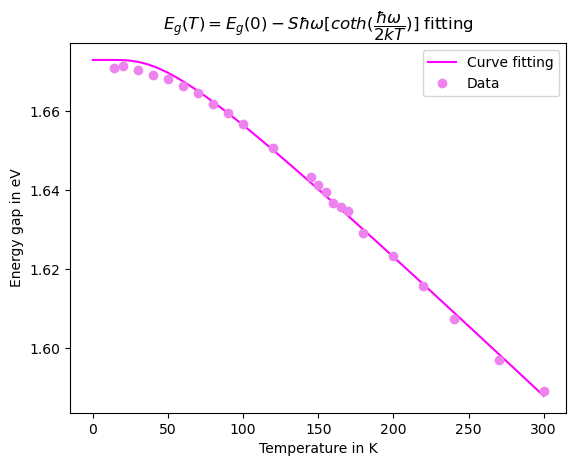

The Curve fitting parameters:
w = 1.838540e+13 Hz
S = 2.0958
hbar * w = 12.101 meV


In [31]:
# from matplotlib import style
# plt.style.use('fivethirtyeight')
# plt.xkcd()
plt.plot(x, eqn2(x, params[0], params[1]), label="Curve fitting", c="magenta")
plt.plot(temp, energy_gap, 'o', label="Data", c='violet')
plt.xlabel("Temperature in K")
plt.ylabel("Energy gap in eV")
plt.legend()
plt.title("$E_g(T) = E_g(0) - S\hbar \omega [coth(\dfrac{\hbar \omega}{2kT})] $ fitting", loc="center")
# plt.title("$mc^2$")
# plt.xlim(0, 100)
plt.show()
print("The Curve fitting parameters:")
print(r"w = {:e} Hz".format(params[1]))
print("S = %.4f" %params[0])
print("hbar * w = %.3f meV"%(params[1]*cnt.hbar*1000/cnt.e))

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

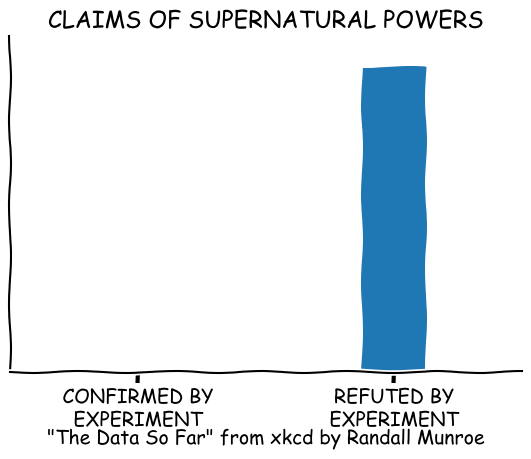

In [29]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines[['top', 'right']].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Munroe',
        ha='center')

plt.show()
